### 2.5. Automatic Differentiation

- Fortunately all modern deep learning frameworks take this work off our plates by offering automatic differentiation (often shortened to autograd). 

- As we pass data through each successive function, the framework builds a computational graph that tracks how each value depends on others. 

- To calculate derivatives, automatic differentiation works backwards through this graph applying the chain rule. 

- The computational algorithm for applying the chain rule in this fashion is called backpropagation.

In [20]:
import torch

#### 2.5.1. A Simple Function

By default, column vector $\mathbf{x}$.

In [21]:
# x tensor 1d, y = 2x^T * x, and x^T = x
x = torch.arange(4.0)
print(x)

# avoid allocating new memory requires_grad=True
x = torch.arange(4.0, requires_grad=True)
# 1 + 4 + 9
y = 2 * torch.dot(x, x)
y

tensor([0., 1., 2., 3.])


tensor(28., grad_fn=<MulBackward0>)

In [22]:
# take the gradient of y with respect to x -> access gradient via x's grad sttribute
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [23]:
x.grad == 4 * x

tensor([True, True, True, True])

In [24]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

#### 2.5.2. Backward for Non-Scalar Variables

- *Jacobian matrix* that contains the partial derivatives of each component of y with respect to each component of x.

- Representing the value of our loss function calculated separately for each example among a *batch* of training examples.

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*jJ8p5bTATJpZFtner6DYOw.png)

In [25]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

#### 2.5.3. Detaching Computation

Suppose we have z = x * y and y = x * x but we want to focus on the direct influence of x on z rather than the influence conveyed via y. 

- In this case, we can create a new variable u that takes the same value as y but whose provenance (how it was created) has been wiped out. 

- Thus u has no ancestors in the graph and gradients do not flow through u to x.

In [26]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [27]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

#### 2.5.4. Gradients and Python Control Flow

Even though our function f is, for demonstration purposes, a bit contrived, its dependence on the input is quite simple: 

- It is a linear function of a with piecewise defined scale. 

- As such, f(a) / a is a vector of constant entries and,

- moreover, f(a) / a needs to match the gradient of f(a) with respect to a.

In [28]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [29]:
a.grad == d / a

tensor(True)

#### 2.5.5. Discussion

#### 2.5.6. Exercises

#### **Ex 1**
It's because you use the chain rule to compute derivatives with autodiff, which gives you a chain of partial derivatives multiplied together. Now, to take the second derivative, you also have to apply the product rule as well, which can add up quickly.

As a simple example, let
>$f(x) = h(g(x))$

Then, we have:
>$df/dx = dh/dg * dg/dx$

Now, for second derivative we have:
>$d^2f/dx^2 = (d^2h/dg dx) * dg/dx + (d^2g/dx^2) * dh/dx$

#### **Ex 2**
RuntimeError: 
- Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). 

- Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). 

- Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [30]:
# Ex 2
x = torch.tensor([4.0], requires_grad=True)
y = x**3 + 1/x
y.backward()

In [31]:
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

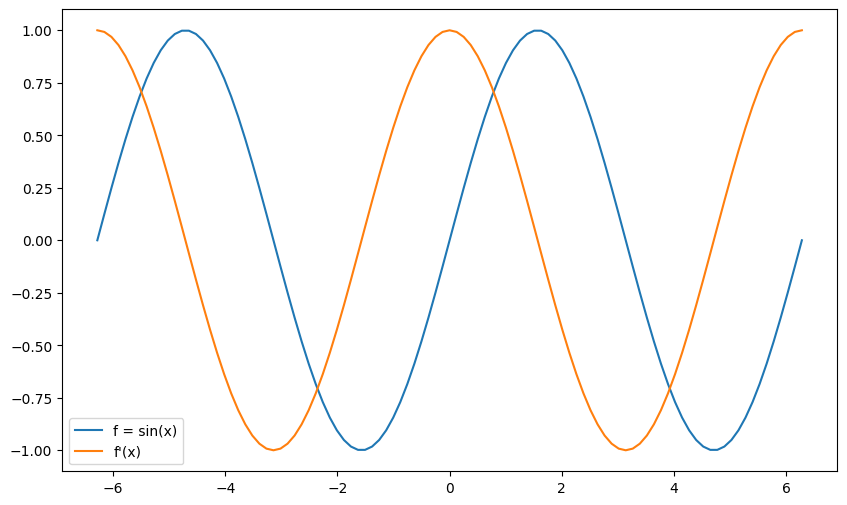

In [54]:
# Ex 3 -> 2.5.2
# Ex 4

import matplotlib.pyplot as plt
import math

x = torch.linspace(-2.0 * math.pi, 2.0 * math.pi, 101, requires_grad=True)
f = torch.sin(x)
f.sum().backward()

plt.figure(figsize=(10,6))
plt.plot(x.detach().numpy(), f.detach().numpy(), label = 'f = sin(x)')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'f\'(x)')

plt.legend()
plt.show()



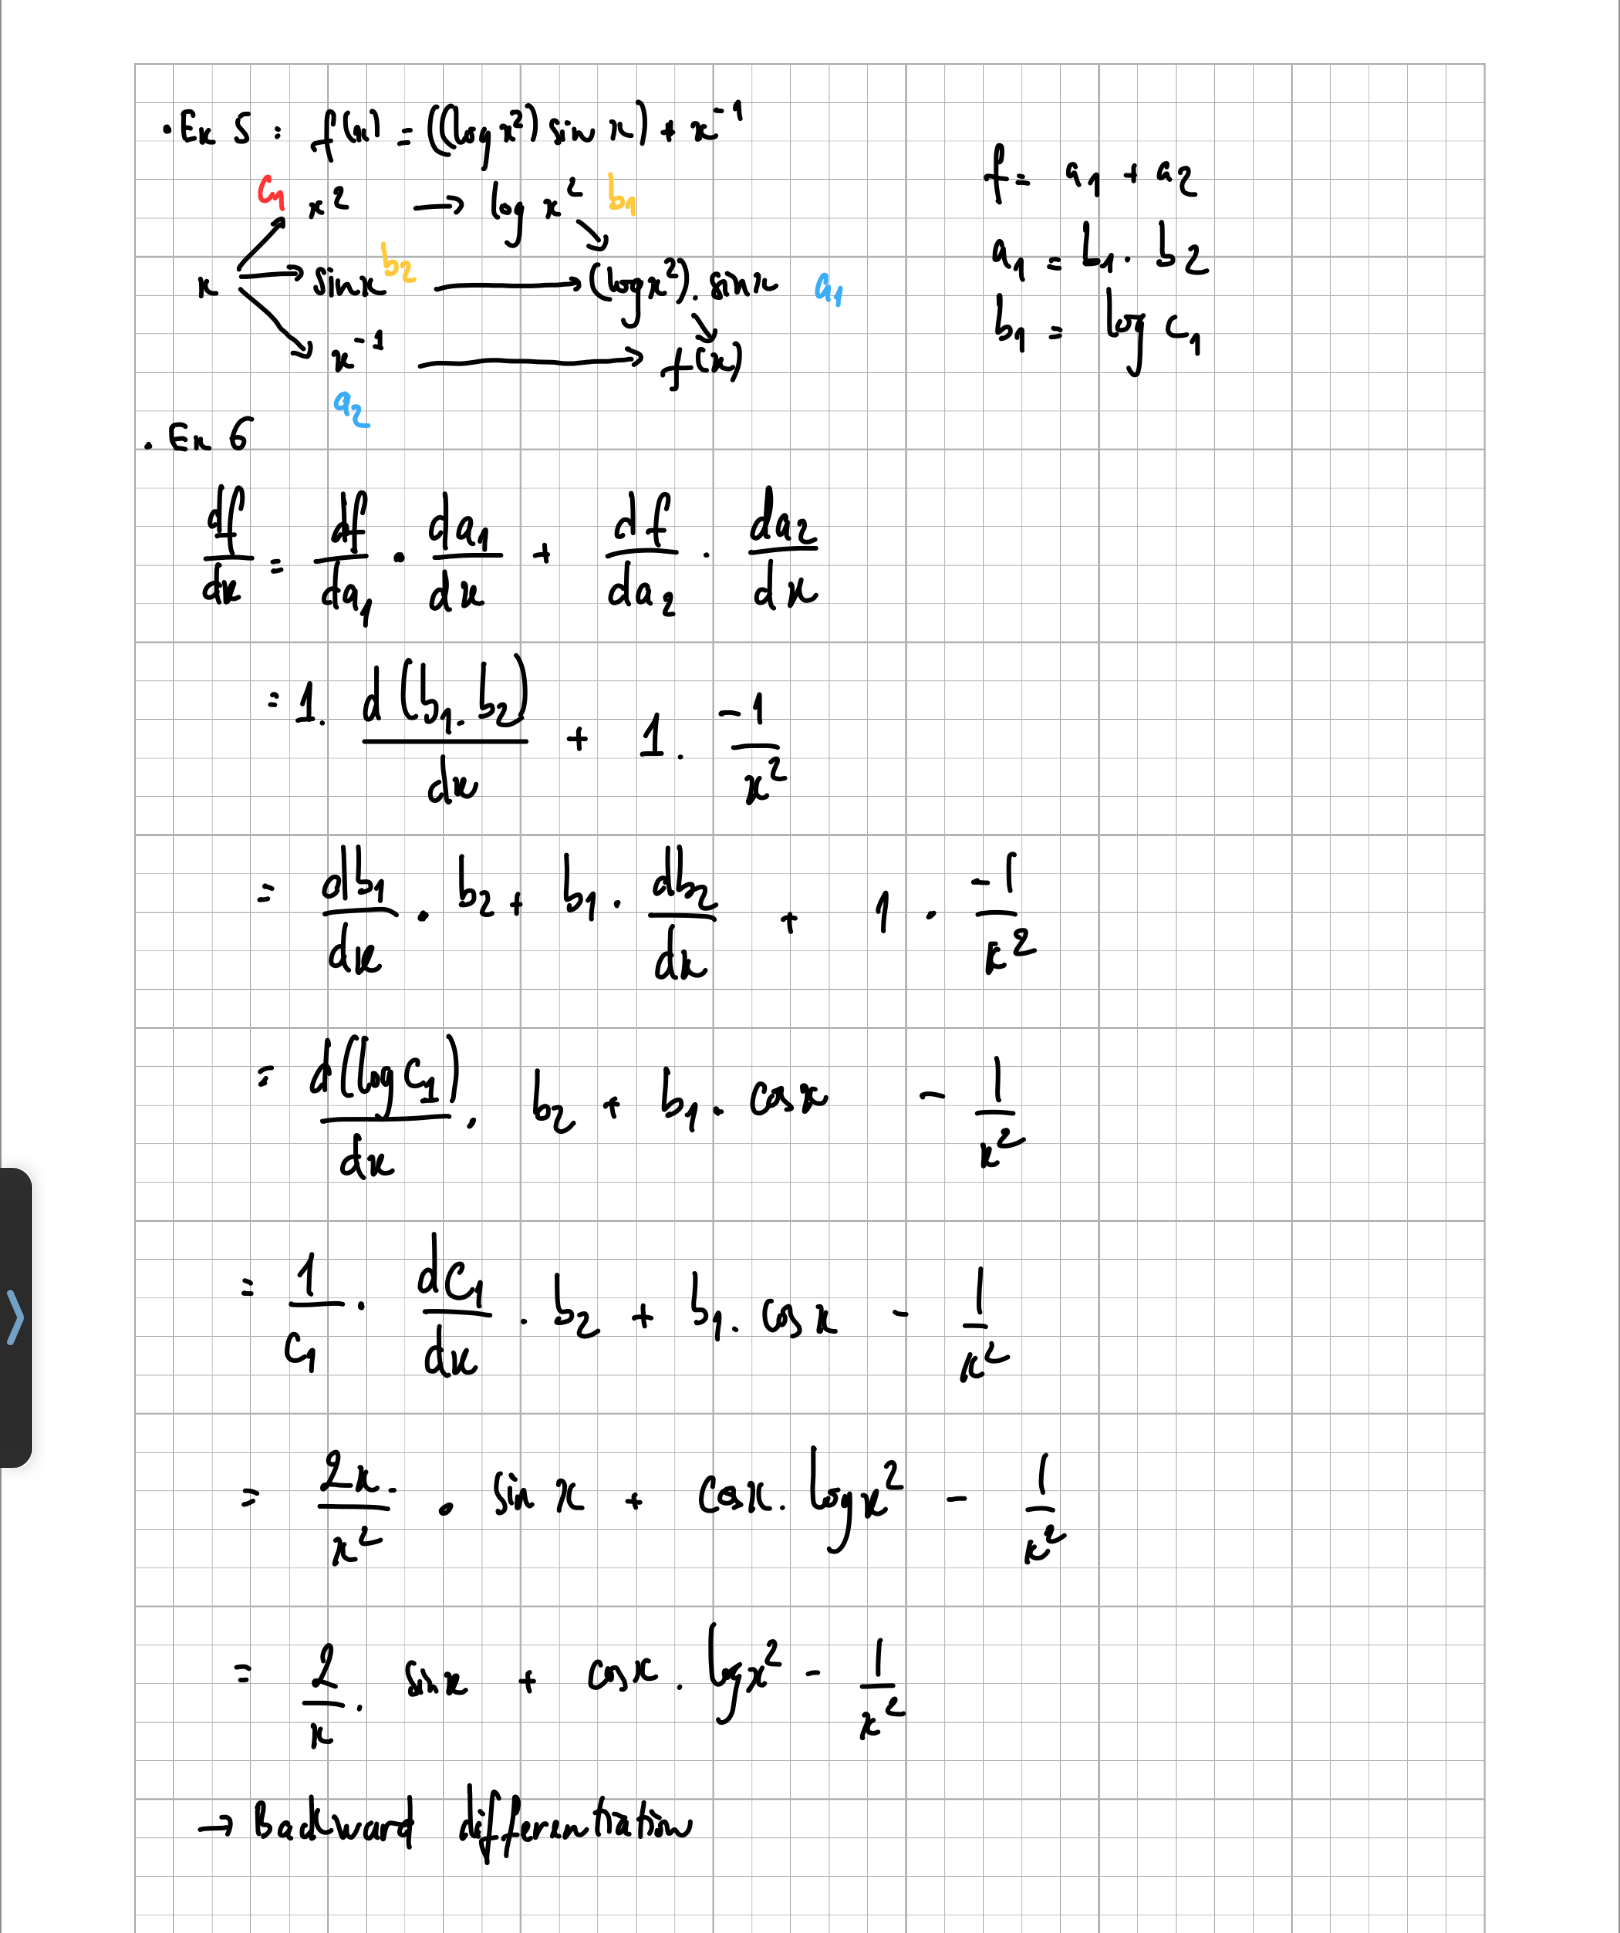

In [57]:
# Ex 5, 6, 7, 8
import os
from PIL import Image
im = Image.open(os.path.join('..', 'JupyterAI', 'assets/[2.5].jpeg'))
im